## Identify Sentiments 

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv("../Dataset/AV_NLP/train.csv", index_col=0)
user_stopwords = ['iphon', 'appl', 'samsung', 'sony', 'phone', 'iphones', 'galaxi', 
                  'ipad', 'soni','thi','iphonex', 'itune','itun', 'ipod', 'girl', 
                  'photo']
stopwords = set(nltk.corpus.stopwords.words("English")+ user_stopwords)
lemmatizer = nltk.WordNetLemmatizer()
stem = nltk.PorterStemmer()
wordnet_lema= nltk.WordNetLemmatizer()
data.head(10)

,label,tweet
id,,
1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
2,0,Finally a transparant silicon case ^^ Thanks t...
3,0,We love this! Would you go? #talk #makememorie...
4,0,I'm wired I know I'm George I was made that wa...
5,1,What amazing service! Apple won't even talk to...
6,1,iPhone software update fucked up my phone big ...
7,0,Happy for us .. #instapic #instadaily #us #son...
8,0,New Type C charger cable #UK http://www.ebay.c...
9,0,Bout to go shopping again listening to music #...


In [3]:
def cleaning_data (text):

    '''
        Cleaning text:
        1. Removing Punctuation(special character)
        2. Links in the text
        3. Any word less than 2 word such as is , am 
        4. Lematize it to standard version
        5. Removing any duplicates after lematization

    '''
    clean_str = " "
    for word in text.split():

        if str(word).lower().strip()[:4]!='http' :         #Removing Hyperlink
            
            if len(word)> 3:
                word = "".join(filter(str.isalpha, word))    # Getting only Alphabet : no digits and special char
#                 word = lemmatizer.lemmatize(word)        # Makeit lemmatimize
                word = wordnet_lema.lemmatize(word, pos = 'n')
                word= stem.stem(word)
                if word.lower() not in stopwords  and len(word)>2:                   # Removing Stopwords
                    
                    clean_str = clean_str + " " + word.lower()
                    
    clean_str = " ".join(set(clean_str.split()))    # removing duplicates        
    return clean_str


In [4]:
# Building a clean datframe part

data['clean_text'] = data['tweet'].apply(lambda x : cleaning_data(x))


In [5]:
pd.set_option('display.max_colwidth', -1)
data.head(10)

,label,tweet,clean_text
id,,,
1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,health cute pregnanc fingerprint android app iphoneonli iphonesia iger beauti test
2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,yay xperia thank uncl case final sonyexperia transpar silicon
3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,relax smartphon talk makememori wifi connect love unplug would
4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,georg wire cute daventri made home know
5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,stupid support servic wont talk even question amaz unless
6,1,iPhone software update fucked up my phone big time Stupid iPhones,stupid fuck updat time softwar
7,0,Happy for us .. #instapic #instadaily #us #sony #xperia #xperiaZ https://instagram.com/p/z9qGfWlvj7/,xperia instap happi instadaili xperiaz
8,0,New Type C charger cable #UK http://www.ebay.co.uk/itm/-/112598674021 … #bay #Amazon #etsy New Year #Rob Cross #Toby Young #EVEMUN #McMafia #Taylor #SPECTRE 2018 #NewYear #Starting 2018 #recipes #technology #SamsungGalaxyS9 #iPhoneX pic.twitter.com/PjIwq59WtC,young mcmafia year cross taylor samsunggalaxi bay cabl pictwittercompjiwqwtc recip type technolog tobi start charger amazon spectr etsi newyear rob evemun
9,0,Bout to go shopping again listening to music #iphone #justme #music #likeforlike #followforfollow… http://instagr.am/p/Vj6bg5tLql/,bout followforfollow shop likeforlik listen music justm


## Word Cloud for both Positive and Negative sentiment

In [6]:
from wordcloud  import WordCloud, STOPWORDS
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()


Positive words  
 ********* 
 


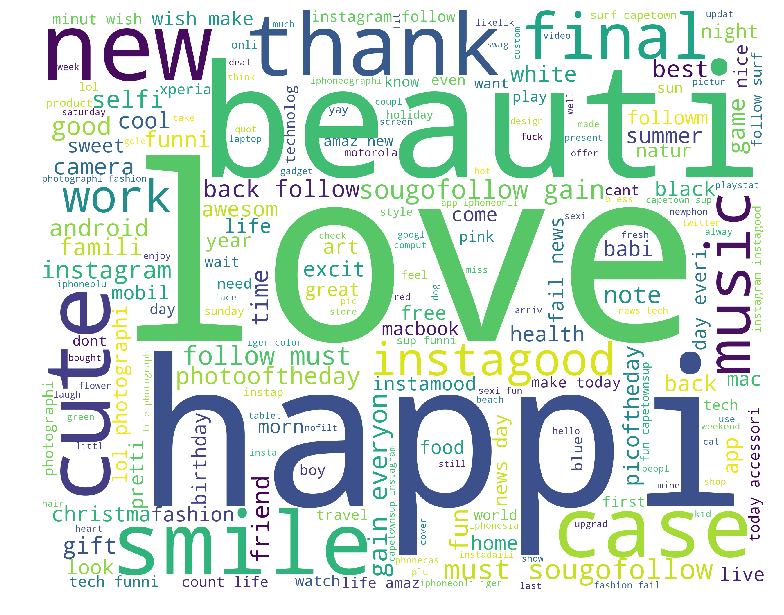

In [7]:
print("Positive words  \n ********* \n ")
wordcloud_draw(data[data['label']==0]['clean_text'],'white')

Negative words 
 *********  



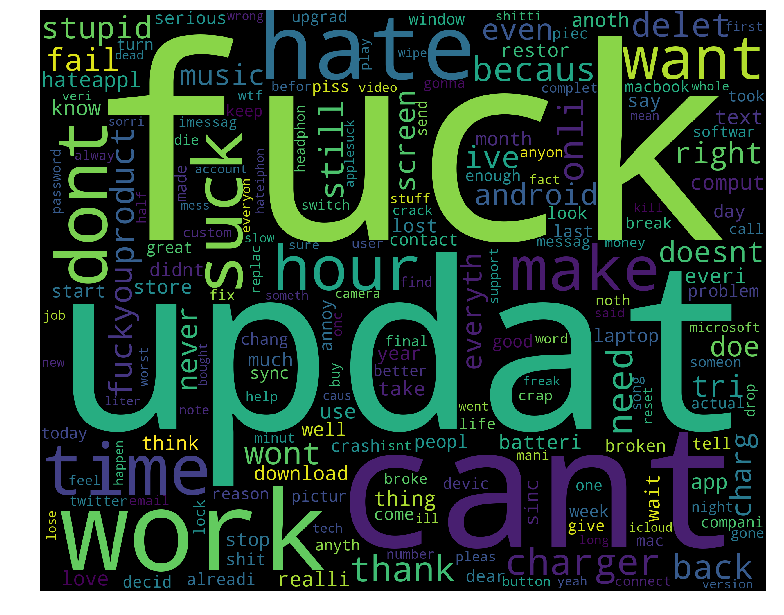

In [8]:
print("Negative words \n *********  \n")
wordcloud_draw(data[data['label']==1]['clean_text'])

# Split Data to training and test set

In [9]:
# Reducing chances for overfitting the model

from sklearn.utils import shuffle

data= shuffle(data)
X_train , X_test = data.iloc[:7000], data.iloc[7000:]
print("Train \n " , X_train['label'].value_counts())
print("\nTest \n " , X_test['label'].value_counts())

Train 
  0    5185
1    1815
Name: label, dtype: int64

Test 
  0    709
1    211
Name: label, dtype: int64


# Converting Text to Vectors using CountVectorizer

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

cnt_vec = CountVectorizer()
vector = cnt_vec.fit_transform(X_train['clean_text'])
# summarize encoded vector
print(vector.shape)
# print(cnt_vec.vocabulary_)
# print(type(vector))
# print(vector.toarray())



(7000, 13530)


## Applying TFIDF to the CountVectorized Data 

In [11]:
from sklearn.feature_extraction.text import TfidfTransformer

tfid = TfidfTransformer()
tfidf =tfid.fit_transform(vector)
print(tfid)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)


## Fit a MultiBinomial model to data

In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

multi_nb = MultinomialNB()
multi_nb.fit(tfidf, X_train['label'])
scoring = 'roc_auc'
result = cross_val_score(multi_nb, tfidf,  X_train['label'], scoring = scoring)
print(f"AUC: {result.mean()} ({result.std()})")

AUC: 0.9334182372983211 (0.0038413332368352664)


## Seting up the pipeline

    1. Using Multibinomial NB
    2. Using SGDClassifier
    3. Logistic Regression
    4. Random Forest Classifier

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier

text_clf_mult = Pipeline([
    ('vect', CountVectorizer(binary=True)),
    ('tfidf', TfidfTransformer() ),
    ('multi', MultinomialNB())
])

text_clf_mult.fit(X_train['clean_text'], X_train['label'])
print("Score of the Multibinomial NB Algo :", text_clf_mult.score(X_test['clean_text'], X_test['label']))


Score of the Multibinomial NB Algo : 0.8989130434782608


In [14]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier

text_clf_sgd = Pipeline([
    ('vect', CountVectorizer(binary=True)),
    ('tfidf', TfidfTransformer() ),
    ('sgd', SGDClassifier())
])

text_clf_sgd.fit(X_train['clean_text'], X_train['label'])
print("Score of the SGD Algo:", text_clf_sgd.score(X_test['clean_text'], X_test['label']))

Score of the SGD Algo: 0.8956521739130435


In [15]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

text_clf_log = Pipeline([
    ('vect', CountVectorizer(binary=True)),
    ('tfidf', TfidfTransformer() ),
    ('logistic', LogisticRegression(C=2))
])

text_clf_log.fit(X_train['clean_text'], X_train['label'])
print("Score of the Logistic Algo:", text_clf_log.score(X_test['clean_text'], X_test['label']))

Score of the Logistic Algo: 0.8989130434782608


In [16]:

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

text_clf_rand = Pipeline([
    ('vect', CountVectorizer(binary=True)),
    ('tfidf', TfidfTransformer() ),
    ('rand', RandomForestClassifier(n_estimators=100, bootstrap = True))
])

text_clf_rand.fit(X_train['clean_text'], X_train['label'])
print("Score of the Random Forest Algo:", text_clf_rand.score(X_test['clean_text'], X_test['label']))

Score of the Random Forest Algo: 0.883695652173913


### Hyper - parametrization 

In [17]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'vect__ngram_range': [(1, 1), (1, 2), (1,3)],
    'tfidf__use_idf': (True, False),
    'sgd__alpha': (1e-2,1e-3,1e-4),
}

gs_clf = GridSearchCV(text_clf_sgd, parameters, cv=5, iid=False, n_jobs=-1)


print("Best Parameter for the model", gs_clf.best_params_ )

gs_clf_train = gs_clf.fit(X_train['clean_text'], X_train['label'])
predicted = gs_clf_train.predict(X_test['clean_text'])
print(f"\nAccuracy : ", np.mean(predicted == X_test['label']))

#Fitting to entire training set 
gs_clf = gs_clf.fit(data['clean_text'], data['label'])


AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

## Prediction on Actual Test File

In [ ]:
#Importing test data  

test_data = pd.read_csv("../Dataset/AV_NLP/test.csv", index_col=0)

## Cleaning test tweets
test_data['clean_text']= test_data['tweet'].apply(lambda x : cleaning_data(x))
test_data.head()

## Prediction using the model
predict_val = gs_clf.predict(test_data['clean_text'])

In [ ]:
final_combine =[]

for i in range(0,len(test_data)):
    final_combine.append([test_data.first_valid_index()+i, 
                          predict_val[i],
                          test_data.loc[test_data.first_valid_index()+i]['clean_text'],
                         test_data.loc[test_data.first_valid_index()+i]['tweet']])
    

In [ ]:
## Submission File creation

sub_df= pd.DataFrame(final_combine, columns=['id','label', 'clean_tweet', 'tweet'])
sub_df.head(100)

sub_df[['id', 'label']].to_csv("../Dataset/AV_NLP/Sub_nl_sgd_stem.csv", index = False)